# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [1]:
# General tools
import pandas as pd
import numpy as np

# Functions
from functions import *

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from pprint import pprint

# Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Classification (Initial)

In [2]:
# Load dataframe 
df = pd.read_pickle('df.pkl')

# Partition explanatory and response variables
X = df.drop(columns=['Target', 'Id', 'idhogar'])
print(X.shape)

y = df['Target']
print(y.shape)

(9557, 135)
(9557,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [4]:
clf_linear = LinearRegression()

In [5]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Scores are intended for multiclassification models, not regression, but we were curious to see what would happen
f1_linear = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_linear)

Accuracy: 0.49476987447698745
Precision: 0.46809801017047087
Recall: 0.31707313738183174
f1 Score: 0.28386560965239604


/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Multiclass Logistic

In [7]:
clf_multiclass_logistic = LogisticRegressionCV(cv=5, class_weight='balanced', multi_class='multinomial', max_iter=1000)

In [8]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [9]:
y_pred = clf_multiclass_logistic.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_logistic = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_logistic)

Accuracy: 0.5732217573221757
Precision: 0.43858717357215476
Recall: 0.48674016106171647
f1 Score: 0.44265012889768707


## SVM

In [10]:
clf_SVM = SVC(gamma='auto')

In [11]:
clf_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = clf_SVM.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Scores
f1_SVM = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_SVM)

Accuracy: 0.6260460251046025
Precision: 0.3377727237684064
Recall: 0.26139879508825303
f1 Score: 0.22173155053186192


## Random Forest

In [13]:
clf_RF = RandomForestClassifier(n_estimators=10)

In [14]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
y_pred = clf_RF.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_RF = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_RF)

Accuracy: 0.8906903765690377
Precision: 0.8889112890026093
Recall: 0.7906634897994875
f1 Score: 0.8318647724346035


In [16]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQBmeaned,0.053277
meaneduc,0.049861
SQBdependency,0.029041
overcrowding,0.027922
SQBhogar_nin,0.026686
qmobilephone,0.026034
hogar_nin,0.024124
SQBedjefe,0.022417
SQBovercrowding,0.022227
agesq,0.020422


## XGB Classifier

In [17]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [18]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [19]:
y_pred = clf_xgb.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_xgb = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_xgb)

Accuracy: 0.8603556485355649
Precision: 0.8703446826672558
Recall: 0.7373844106796965
f1 Score: 0.7887912428409045


### Feature Importance (XGBoost)

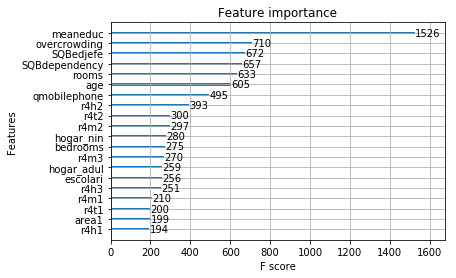

In [20]:
xgb.plot_importance(clf_xgb, max_num_features=20)

# Classification with Predicted Rent Values

In [21]:
# Load dataframe 
df_rent = pd.read_pickle('df_rent.pkl')

# Partition explanatory and response variables
X = df_rent.drop(columns=['Target', 'Id', 'idhogar'])
print(X.shape)

y = df_rent['Target']
print(y.shape)

(9557, 136)
(9557,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [23]:
clf_linear = LinearRegression()

In [24]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Scores are intended for multiclassification models, not regression, but we were curious to see what would happen
f1_linear_rent = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_linear_rent)

Accuracy: 0.49581589958158995
Precision: 0.4699045330595185
Recall: 0.31918632252479745
f1 Score: 0.2852340484472146


/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Multiclass Logistic

In [26]:
clf_multiclass_logistic = LogisticRegressionCV(cv=5, class_weight='balanced', multi_class='multinomial', max_iter=1000)

In [27]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [28]:
y_pred = clf_multiclass_logistic.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_logistic_rent = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_logistic_rent)

Accuracy: 0.48797071129707115
Precision: 0.35727649670468997
Recall: 0.39552356932064314
f1 Score: 0.34733981142183556


## SVM

In [29]:
clf_SVM = SVC(gamma='auto')

In [30]:
clf_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
y_pred = clf_SVM.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_SVM_rent = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_SVM_rent)

Accuracy: 0.6323221757322176
Precision: 0.9076458223857068
Recall: 0.258423939198919
f1 Score: 0.2099798668643043


## Random Forests

In [32]:
clf_RF = RandomForestClassifier(n_estimators=10)

In [33]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_pred = clf_RF.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_RF_rent = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_RF_rent)

Accuracy: 0.8980125523012552
Precision: 0.8932410379745842
Recall: 0.8050007946296405
f1 Score: 0.8432208163902143


In [35]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
meaneduc,0.051493
v2a1,0.050256
SQBmeaned,0.041808
SQBdependency,0.034094
SQBedjefe,0.025239
SQBhogar_nin,0.022083
SQBovercrowding,0.021451
qmobilephone,0.021348
SQBage,0.021136
overcrowding,0.020659


## XGB Classifier

In [36]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [37]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [38]:
y_pred = clf_xgb.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_xgb_rent = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_xgb_rent)

Accuracy: 0.8640167364016736
Precision: 0.8792332663789995
Recall: 0.7431507568522947
f1 Score: 0.7952230599146265


### Feature Importance (XGBoost)

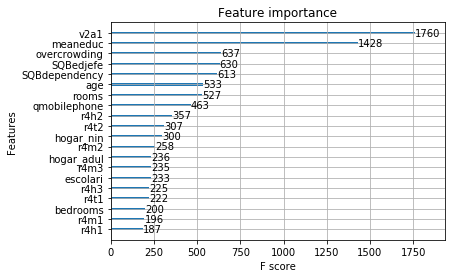

In [39]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models (No Rent vs Rent)

In [40]:
print("Change in f1 with predicted rent values:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_rent - f1_linear, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_rent - f1_logistic, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_rent - f1_SVM, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_rent - f1_RF, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_rent - f1_xgb, 5))

Change in f1 with predicted rent values:

Linear Regression:	  0.00137
Logistic Regression:	 -0.09531
Support Vector Machines: -0.01175
Random Forrest:		  0.01136
XGBoost:		 0.00643


### Random Forest vs XGBoost

In [41]:
print("NO RENT (RF)", f1_RF)
print("W/ RENT (RF)", f1_RF_rent)
print("NO RENT (XGB)", f1_xgb)
print("W/ RENT (XGB)", f1_xgb_rent)

NO RENT (RF) 0.8318647724346035
W/ RENT (RF) 0.8432208163902143
NO RENT (XGB) 0.7887912428409045
W/ RENT (XGB) 0.7952230599146265


# Classification with Predicted Rent Values AND Tranformations

In [42]:
# Load dataframe 
df_trans = pd.read_pickle('df_trans.pkl')

# Partition explanatory and response variables
X = df_trans.drop(columns=['Target', 'Id', 'idhogar'])
print(X.shape)

y = df_trans['Target']
print(y.shape)

(9557, 141)
(9557,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [44]:
clf_linear = LinearRegression()

In [45]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Scores are intended for multiclassification models, not regression, but we were curious to see what would happen
f1_linear_trans = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_linear_trans)

Accuracy: 0.4963389121338912
Precision: 0.43780082382162255
Recall: 0.3191770562231336
f1 Score: 0.28457750323572967


/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Multiclass Logistic

In [47]:
clf_multiclass_logistic = LogisticRegressionCV(cv=5, class_weight='balanced', multi_class='multinomial', max_iter=1000)

In [48]:
clf_multiclass_logistic.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [49]:
y_pred = clf_multiclass_logistic.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_logistic_trans = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_logistic_trans)

Accuracy: 0.6265690376569037
Precision: 0.1568062827225131
Recall: 0.24958333333333332
f1 Score: 0.19260450160771705


/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM

In [50]:
clf_SVM = SVC(gamma='auto')

In [51]:
clf_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
y_pred = clf_SVM.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_SVM_trans = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_SVM_trans)

Accuracy: 0.6302301255230126
Precision: 0.6573151546932354
Recall: 0.2547904253773174
f1 Score: 0.20259375115214723


/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forests

In [53]:
clf_RF = RandomForestClassifier(n_estimators=10)

In [54]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
y_pred = clf_RF.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_RF_trans = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_RF_trans)

Accuracy: 0.9100418410041841
Precision: 0.9073997922078983
Recall: 0.8305666511436691
f1 Score: 0.8642688705455102


In [56]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQ_v2a1,0.057049
v2a1,0.046025
LOG_meaneduc,0.039644
SQBmeaned,0.039048
meaneduc,0.033032
SQBdependency,0.030123
SQBhogar_nin,0.022541
SQ_overcrowding,0.022195
LOG_SQBdependency,0.021279
SQBovercrowding,0.020065


## XGB Classifier

In [57]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [58]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [59]:
y_pred = clf_xgb.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='macro'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# f1 Score
f1_xgb_trans = f1_score(y_test, y_pred, average='macro')
print("f1 Score:", f1_xgb_trans)

Accuracy: 0.8593096234309623
Precision: 0.8731775666801321
Recall: 0.7374470472333206
f1 Score: 0.7876736733435243


### Feature Importance (XGBoost)

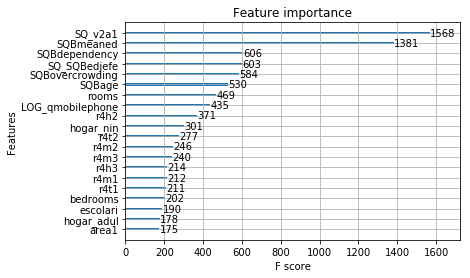

In [60]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models (Rent vs Rent with Transposed)

In [61]:
print("Change in f1 with predicted rent values and transposed features:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_trans - f1_linear_rent, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_trans - f1_logistic_rent, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_trans - f1_SVM_rent, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_trans - f1_RF_rent, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_trans - f1_xgb_rent, 5))

Change in f1 with predicted rent values and transposed features:

Linear Regression:	  -0.00066
Logistic Regression:	 -0.15474
Support Vector Machines: -0.00739
Random Forrest:		  0.02105
XGBoost:		 -0.00755


### Random Forest vs XGBoost

In [62]:
print("RENT (RF)\t", f1_RF_rent)
print("RENT / TRANSFORMED (RF)", f1_RF_trans)
print("RENT (XGB)\t", f1_xgb_rent)
print("RENT / TRANSFORMED (XGB)", f1_xgb_trans)

RENT (RF)	 0.8432208163902143
RENT / TRANSFORMED (RF) 0.8642688705455102
RENT (XGB)	 0.7952230599146265
RENT / TRANSFORMED (XGB) 0.7876736733435243
